In [1]:
import import_ipynb

import Extroversion_boost
import Agreeableness_boost
import Conscientiousness_boost
import Neuroticism_boost
import Openness_boost

import Music_boost
import Movies_boost
import MusicInst_boost
import Fun_boost
import Internet_boost
import Sports_boost
import Country_boost

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import r2_score

importing Jupyter notebook from Extroversion_boost.ipynb
importing Jupyter notebook from Agreeableness_boost.ipynb
importing Jupyter notebook from Conscientiousness_boost.ipynb
importing Jupyter notebook from Neuroticism_boost.ipynb
importing Jupyter notebook from Openness_boost.ipynb
importing Jupyter notebook from Music_boost.ipynb
importing Jupyter notebook from Movies_boost.ipynb
importing Jupyter notebook from MusicInst_boost.ipynb
importing Jupyter notebook from Fun_boost.ipynb
importing Jupyter notebook from Internet_boost.ipynb
importing Jupyter notebook from Sports_boost.ipynb
importing Jupyter notebook from Country_boost.ipynb


In [2]:
df = pd.read_csv('scraper/user_data.csv')
l = len(df)
#print(l)

col0 = "post_id"
col1 = "comments"
col2 = "shares"
col3 = "likes"
p1 = df[col0].count()
p2 = df[col1].sum()
p3 = df[col2].sum()
p4 = df[col3].sum()

#p1,p2,p3,p4
print('Posts:',p1)
print('Comments:',p2)
print('Shares:',p3)
print('Likes:',p4)

Posts: 38
Comments: 570
Shares: 5
Likes: 4016


In [3]:
              #Participation Trust
    
# AP denotes the average number of posts per user on the Facebook network of Cheltenham FAcebook Groups
AP = 7.091037402964009

# Calculation of Participation Trust for the scraped data of the new user
if p1 >= AP:
    PT = 1
    print('Participation Trust = 1')
    print('The scraped user is PARTICIPATIVE in the network.')
else:
    PT = 0
    print('Participation Trust = 0')
    print('The scraped user is NON-PARTICIPATIVE in the network.')

Participation Trust = 1
The scraped user is PARTICIPATIVE in the network.


In [4]:
              #Response Trust

acts = p2 + p3 + p4
#print(acts)

W_ACTS = []

for i in range(l):
    s = df.comments[i] * 0.75 + df.shares[i] * 1.0 + df.likes[i] * 0.25
    W_ACTS.append(s)
    
    
# Calculation of Response Trust for each post of the scraped user 
RT = []
for i in range(l):
    RT.append(W_ACTS[i]/acts)

#Calculation of the Average Response Trust for the scraped user
S = 0
for i in range(l):
    S = S + RT[i]
#print(S)

ResT = S / p1
avgRT = round(ResT,4)
#print(avgRT)


#Calculation of Indirect Trust for the scraped user
#IT = 0.5 * PT + 0.5 * avgRT
#print(IT)

p1,PT,avgRT
print('Posts:',p1)
print('Participation Trust:',PT)
print('Average Response Trust:',avgRT)

Posts: 38
Participation Trust: 1
Average Response Trust: 0.0082


In [5]:
df1 = pd.read_csv("INDIRECT_TRUST.csv")

x = df1[['user_posts','Participation Trust', 'Response Trust']].values
y = df1['Indirect Trust'].values

#Split the dataset in training/test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

scaler = StandardScaler()

#Train the model on the training set
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train))
reg = LinearRegression()
reg.fit(normalized_x_train, y_train)

#Predict the test set results
normalized_x_test = pd.DataFrame(scaler.transform(x_test))
y_test_pred = reg.predict(normalized_x_test)
#print(y_test_pred)

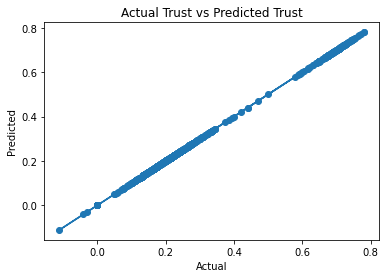

In [6]:
#Plot the results
import matplotlib.pyplot as plt
from scipy import stats
#plt.figure(figsize=(15,10))
slope, intercept, r, p, std_err = stats.linregress(y_test, y_test_pred)

def myfunc(y_test):
    return slope * y_test + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Trust vs Predicted Trust')
plt.plot(y_test, mymodel)
plt.show()

In [7]:
#Evaluate my model
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9999999877463772

In [8]:
t = reg.predict([[p1,PT,avgRT]])
p5 = round(float(t),4)
print('Trust:',p5)

Trust: 0.4997


In [9]:
P1 = Extroversion_boost.person(p1,p2,p3,p4,p5)

[1]
The user is extrovert, quite talkative, sociable and tends to enjoy human interactions with others in the community.


In [10]:
P2 = Agreeableness_boost.person(p1,p2,p3,p4,p5)

[1]
The user is relatively polite, kind and sympathetic towards other people in the community.


In [11]:
P3 = Conscientiousness_boost.person(p1,p2,p3,p4,p5)

[1]
The user is relatively careful, self-disciplined and tends to be dependable for others in the community.


In [12]:
P4 = Neuroticism_boost.person(p1,p2,p3,p4,p5)

[0]
The user is calm, cheerful and has a stong control over his emotions.


In [13]:
P5 = Openness_boost.person(p1,p2,p3,p4,p5)

[1]
The user is strong, tenacious and is constantly seeking new experience.


In [14]:
I1 = Music_boost.imusic(p1,p2,p3,p4,p5)

[1]
The user does not enjoy listening to music.


In [15]:
I2 = Movies_boost.imovies(p1,p2,p3,p4,p5)

[5]
The user enjoys watching movies a lot.


In [16]:
I3 = MusicInst_boost.imusic_inst(p1,p2,p3,p4,p5)

[5]
The user knows and enjoys playing with musical instruments a lot.


In [17]:
I4 = Fun_boost.ifun(p1,p2,p3,p4,p5)

[5]
The user enjoys spending time and having fun with his friends.


In [18]:
I5 = Internet_boost.inet(p1,p2,p3,p4,p5)

[1]
The user does not like to spend time on the Internet.


In [19]:
I6 = Sports_boost.isport(p1,p2,p3,p4,p5)

[1]
The user does not enjoy sport activities.


In [20]:
I7 = Country_boost.icountry(p1,p2,p3,p4,p5)

[5]
The user enjoys participating in outdoors activities at the countryside.
